In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_root = '/content/drive/My Drive/Colab Notebooks/dataset'

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk(data_root):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1009.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1003.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1001.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1008.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1006.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1007.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1004.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1000.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1005.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1002.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1015.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1013.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1014.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1019.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1018

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [4]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma','meningioma', 'pituitary']
for i in labels:
    folderPath = os.path.join(data_root, i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
X_train.ndim

4

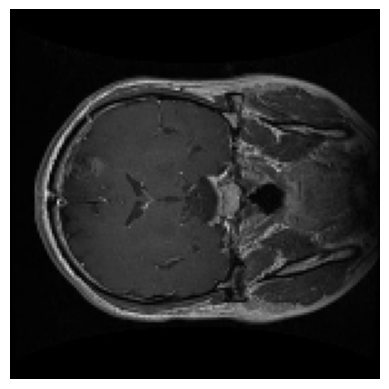

In [6]:
plt.axis('off')
plt.imshow(X_train[32])

In [7]:
X_train, Y_train = shuffle(X_train, Y_train, random_state = 2022)
X_train.shape

(3079, 150, 150, 3)

In [8]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    vertical_flip=True,
)

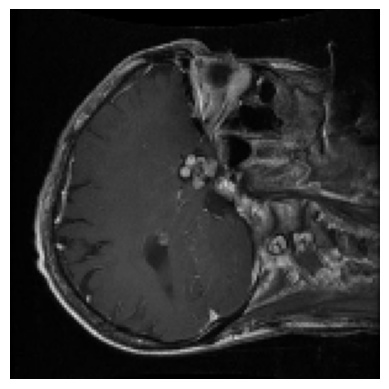

In [9]:
plt.axis('off')
plt.imshow(X_train[32])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.20, random_state = 2022)

In [11]:
len(X_train)

2463

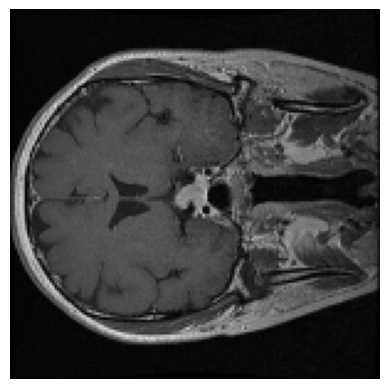

In [12]:
plt.axis('off')
plt.imshow(X_train[89])

In [13]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(3, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [16]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(0.0001), metrics=['accuracy'])

In [17]:
history = model.fit(train_datagen.flow(X_train, y_train), validation_data = (X_test, y_test), epochs=400, validation_split = 0.2, verbose = 1)

Epoch 1/400
77/77 [==============================] - 38s 271ms/step - loss: 1.3286 - accuracy: 0.4109 - val_loss: 1.0742 - val_accuracy: 0.6769
Epoch 2/400
77/77 [==============================] - 18s 227ms/step - loss: 1.0334 - accuracy: 0.4791 - val_loss: 0.9904 - val_accuracy: 0.6088
Epoch 3/400
77/77 [==============================] - 17s 215ms/step - loss: 0.8876 - accuracy: 0.5911 - val_loss: 0.8251 - val_accuracy: 0.6834
Epoch 4/400
77/77 [==============================] - 16s 213ms/step - loss: 0.8141 - accuracy: 0.6525 - val_loss: 0.7822 - val_accuracy: 0.6834
Epoch 5/400
77/77 [==============================] - 17s 222ms/step - loss: 0.7806 - accuracy: 0.6606 - val_loss: 0.7346 - val_accuracy: 0.6867
Epoch 6/400
77/77 [==============================] - 18s 229ms/step - loss: 0.7537 - accuracy: 0.6671 - val_loss: 0.7322 - val_accuracy: 0.6932
Epoch 7/400
77/77 [==============================] - 19s 240ms/step - loss: 0.7324 - accuracy: 0.6740 - val_loss: 0.6924 - val_accuracy:

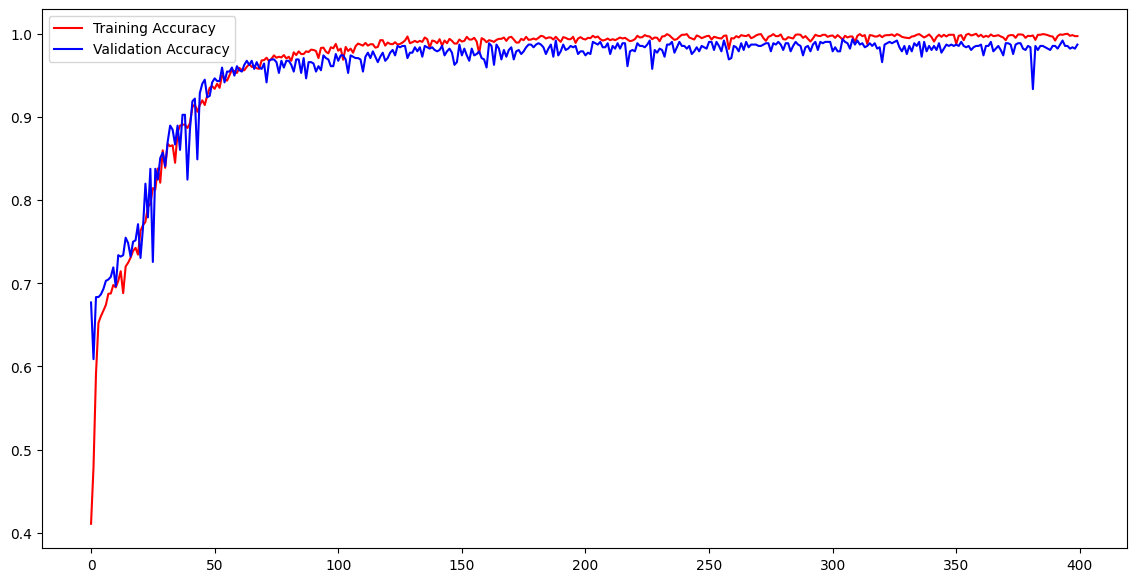

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

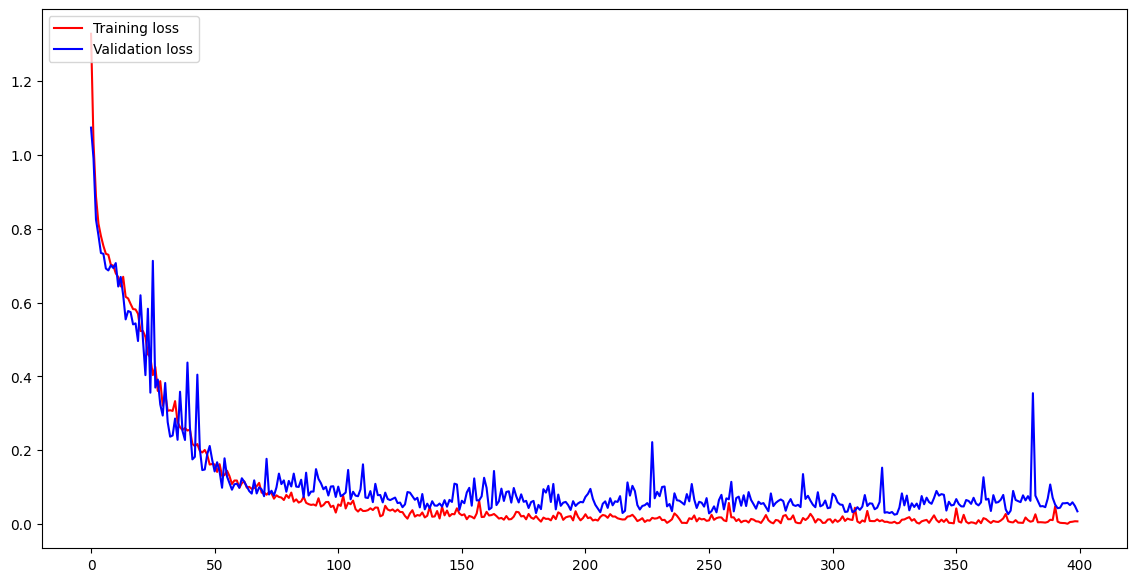

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [20]:
y_pred = model.predict(X_test)
y_pred

20/20 [==============================] - 1s 21ms/step


array([[1.0000000e+00, 1.0059452e-12, 4.9747848e-14],
       [1.0000000e+00, 1.3916281e-16, 1.3708573e-17],
       [1.0698338e-18, 6.4497008e-13, 1.0000000e+00],
       ...,
       [1.0000000e+00, 9.0501053e-18, 2.6145038e-16],
       [1.0000000e+00, 1.4621917e-22, 1.6440215e-25],
       [5.8458253e-23, 1.4806669e-18, 1.0000000e+00]], dtype=float32)

In [21]:
a = y_pred[500]
indices = a.argmax()

if indices == 0:
    print('glioma_tumor')
elif indices == 1:
    print('meningioma_tumor')
elif indices == 2:
    print('pituitary_tumor')
else:
    print('Error in predicting the type of tumor')

pituitary_tumor


In [22]:
y_pred_labels = np.argmax(y_pred, axis = 1)
y_pred_labels

array([0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1,
       1, 1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 1,
       0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0,
       1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0,
       1, 1, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1,
       0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2,
       2, 2, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 1, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 2, 0,

In [23]:
y_test_new[500]

2

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_new, y_pred_labels)
cm

array([[287,   3,   0],
       [  3, 143,   1],
       [  1,   0, 178]])

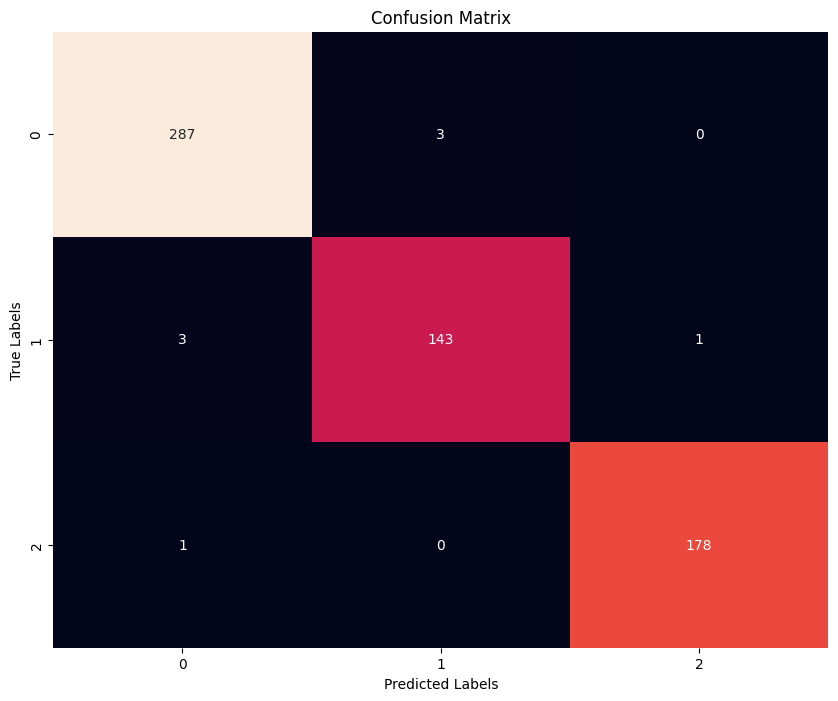

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [41]:
score = accuracy_score(y_test_new, np.argmax(model.predict(X_test), axis = 1))
score

20/20 [==============================] - 0s 21ms/step


0.987012987012987

In [25]:
loss, metrics = model.evaluate(X_test, y_test)
loss, metrics

20/20 [==============================] - 0s 18ms/step - loss: 0.0343 - accuracy: 0.9870


(0.034317634999752045, 0.9870129823684692)

In [26]:
loss, metrics = model.evaluate(X_train, y_train)
loss, metrics

77/77 [==============================] - 2s 19ms/step - loss: 2.4351e-04 - accuracy: 1.0000


(0.00024350731109734625, 1.0)

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new, y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       290
           1       0.98      0.97      0.98       147
           2       0.99      0.99      0.99       179

    accuracy                           0.99       616
   macro avg       0.99      0.99      0.99       616
weighted avg       0.99      0.99      0.99       616

